# `chunked_func`
Performs the specfied operation one "chunk" at a time to save memory.

## Import Packages

In [1]:
import time

import matplotlib.pyplot as plt
import scipy.ndimage as spim
from skimage.morphology import disk

import porespy as ps

ps.visualization.set_mpl_style()

D:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


No module named 'pyedt'


## `func`
We will perform a dilation using scipy's `binary_dilation`

In [2]:
func = spim.binary_dilation

## `im` and `strel`
This function takes a binary image and a structuring element as arguments

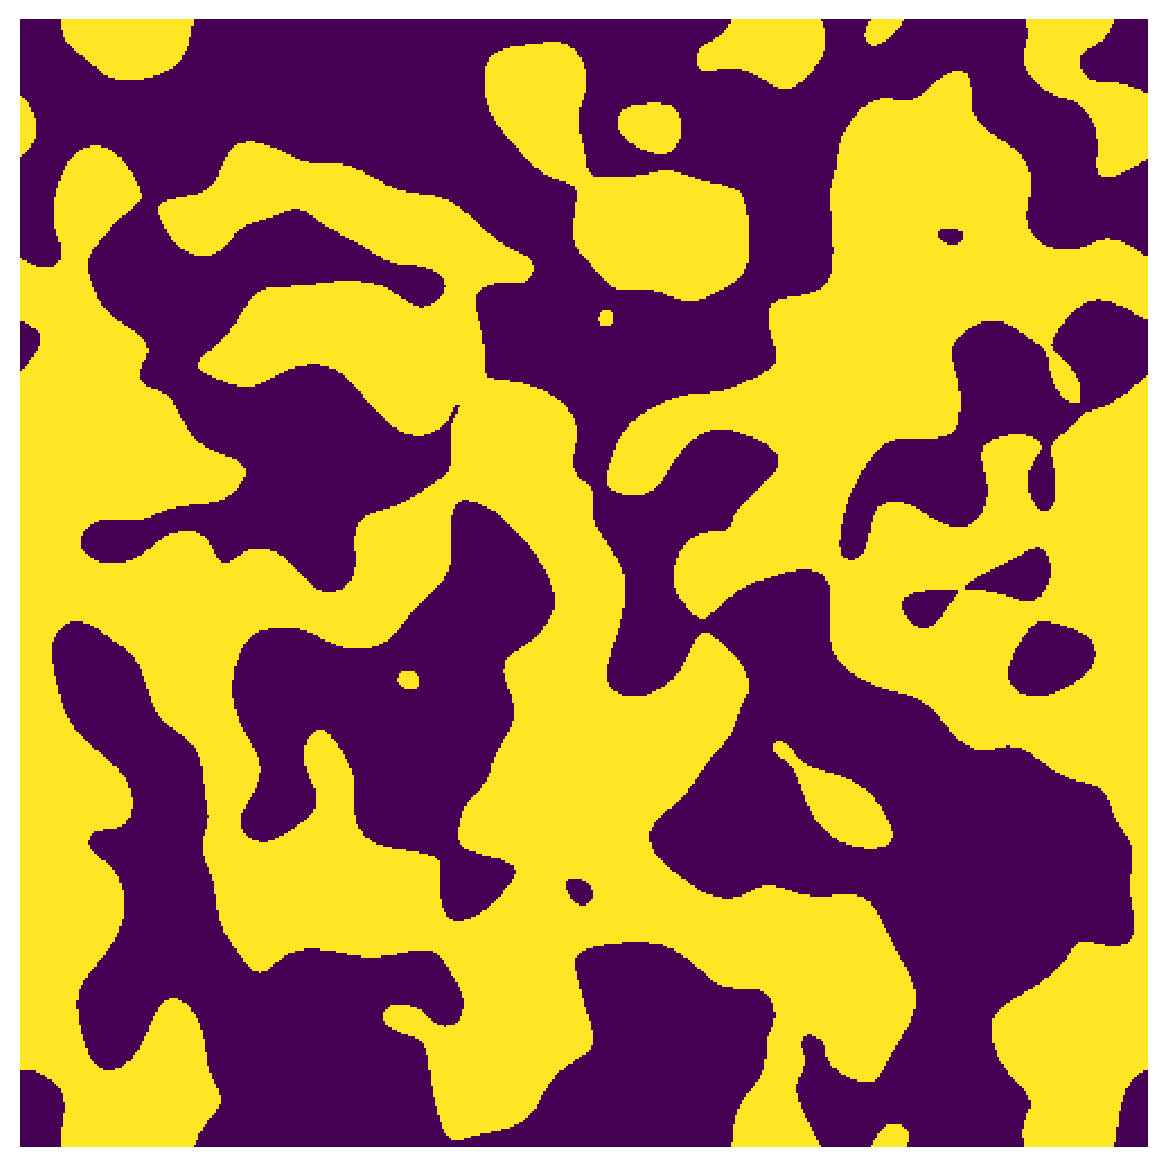

In [3]:
im = ps.generators.blobs(shape=[500, 500])
strel = disk(3)

plt.figure(figsize=[6, 6])
plt.imshow(im)
plt.axis(False);

## `parallel_kw`
The parallel_kw argument takes a dictionary with the following keywords: `overlap`, `divs`, and `cores`. First, the user supplied or default `parallel_kw` dictionary will be checked for available instruction on how to perform parallelization. If not provided, the settings in `porespy.settings` will be used to set parllelization arguments!

## `overlap`, `divs`, and `cores`
If overlap is `None` it will always be the radius of the structuring element. `divs` is the number of chunks to divide the image into in each direction and `cores` is the number of cores to use. The more cores the faster.

OPERATION TIME:
cores=1: 0.31508660316467285 seconds
cores=4: 0.0060253143310546875 seconds


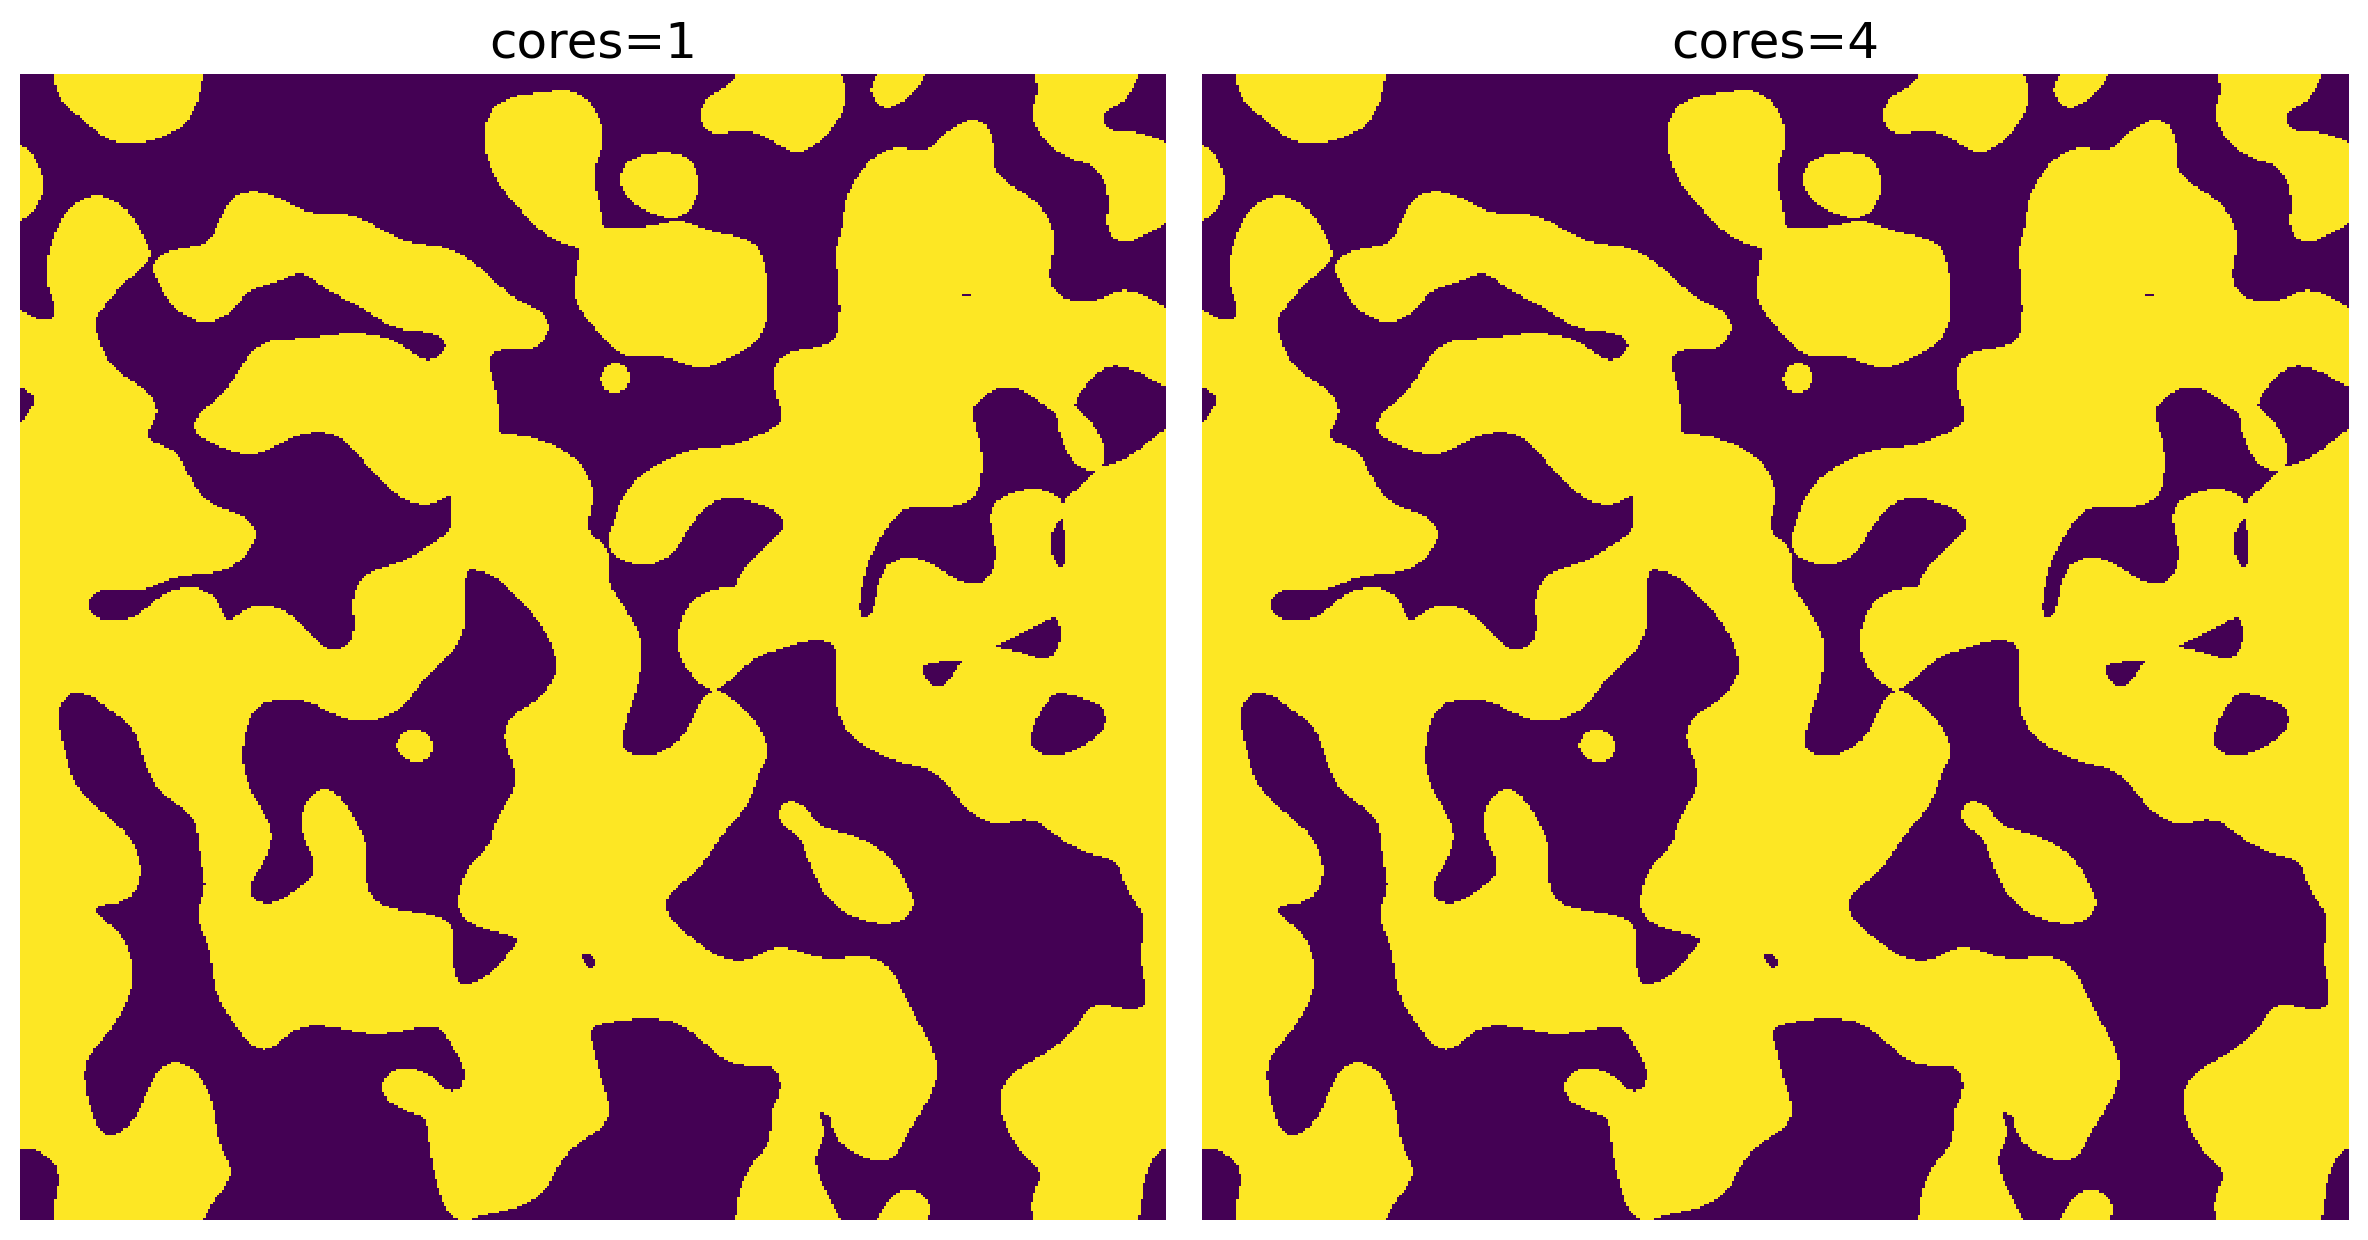

In [4]:
start = time.time()
parallel_kw = {"divs": 4, "overlap": None, "cores": 1}
x1 = ps.filters.chunked_func(func=func, parallel_kw=parallel_kw, input=im, structure=disk(3))
pause = time.time()
parallel_kw = {"divs": 4, "overlap": None, "cores": 4}
x2 = ps.filters.chunked_func(func=func, parallel_kw=parallel_kw, input=im, structure=disk(3))
stop = time.time()

print('OPERATION TIME:')
print('cores=1:', pause-start, 'seconds')
print('cores=4:', stop-pause, 'seconds')

fix, ax = plt.subplots(1, 2, figsize=[12, 12])
ax[0].axis(False)
ax[0].imshow(x1)
ax[0].set_title('cores=1', fontdict={'fontsize': 18})
ax[1].axis(False)
ax[1].imshow(x2)
ax[1].set_title('cores=4', fontdict={'fontsize': 18});